<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Project Title</h3> </center>
<center><h4>Glenn Billman, Shreya Yalamanchili, Sam Zlota</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

#### Problem Statement

Knowing what kind of music to release can be difficult for artists and producers, so this project can help users explore how popular a given song would be today. Artists would then know what type of music is the most popular, and can release songs accordingly. More specifically, our project is focused on predicting a song’s popularity based on features of the track. In this project, we sought to compare several supervised machine learning algorithms to determine the popularity of a given song. Through our analysis, we would like to learn more about what factors are important in determining how popular a song is, what types of songs are more popular, and why certain songs are more popular than others. 

#### Significance of the Problem
It is important to tackle this problem, because it increases efficiency in the music industry. Knowing what kind of music will be popular today makes it much easier for artists and producers to cater new music to these results. In the end, consumers are satisfied because they receive music they enjoy, and artists are satisfied because they realize increased profits. 
Insights from this project can also be useful in other ways. Seeing which of our features most affects popularity can tell artists and producers what to focus on in their music. Furthermore, looking at metrics such as when the song was released and how popular the artist(s) on the song are can provide additional insight on how features related to the song (but not part of the actual music) affect its popularity. 

* **(optional)** Has there been previous work on your topic in terms of applying ML techniques to analyze similar datasets? Do some research into your topic. What algorithms were used? What was the performance of those algorithms? Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

#### Questions/Hypothesis
Given the aforementioned problem and its importance, we set out to tackle the following questions:
* What features are important in determining popularity for a given song? Which features have comparatively little impact on determining popularity?
* Why are certain songs more popular than others?
* What types (genre, region, artist, etc.) of songs are the most popular? What types are least popular?
* Which ML algorithm is most accurate in predicting song popularity?
* How does the average popularity for a given group (genre, artist, release date) change over time?

Based on these questions, we have formulated a list of hypotheses:
* Songs that are released within the past 90 days will be categorized as popular.
* Songs that have an artist popularity above 85 will be categorized as popular.
* Songs that are from the pop genre will be categorized as popular. 
* Songs that are released closer to today will be more popular than songs that were released further in the past.
* Songs that have a medium-high value for “energy” will be more popular than other songs.
* Songs that have a high value for “danceability” will be more popular than other songs.
* Songs that have a higher artist popularity will be more popular than other songs.


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

We retrieved our data for this project from Spotify’s API. To pull 10,000 random songs, we used the search feature of the Spotify API and a text file of the 20,000 most common English words. A word was searched for, and then an offset number between 0 and 200 was chosen to select a song from those results. Some obscure words did not yield results, in which case the loop would start over again with a new word. 

Once we had a dataframe of 10,000 songs, we needed to access the song’s traits. Using the song id, which was included in our original dataframe, we could access the tracks endpoint, which contained most of the information about the song, such as length, tempo, ect. The artist and album information was also stored in a dataframe. From the artist and album json blobs, the artist and album ids were retrieved. To access artist popularity, we used the artist id to access the artist endpoints. The release date was accessed via the album endpoint. 

The raw data set had 10,000 rows with 18 columns. This included general information about a song such as track, artist, id, release date and search term, as well as the song’s qualities, which Spotify determined. There are danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, popularity and artist popularity. 


### 2.2. Data Analysis
The hypothesis our project will test is that songs that are released within the past 90 days will be categorized as popular. For this hypothesis, the independent variable is the song’s days since release and the dependent variable is the popularity index. 

Our predictive model is based on 14 features, which produces one target variable. The outcome variable we are going to predict is a popularity index, which Spotify calculates as an integer between 1-100, with 0 being the least popular and 100 being the most popular. This number is based on the total number of plays and how recent they were. The features are danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration, days since release and artist popularity. These are important predictors for popularity, because they are all unique features of the song and the environment around the song (artist/release date). How a song sounds greatly influences how popular it is, and our features break down and quantify this. Furthermore, the artist and release data can help explain some of the variability in the popularity regression. 

This model is a supervised machine learning problem, and the sub-category of the learning task is regression. Our dataset includes a set of feature variables and one outcome variable. These variables can be used for a supervised machine learning task, because we can map our feature variables to our outcome variable to determine the popularity of a given song. The songs can be classified into a given popularity number based on their features. Therefore, if we provided a brand new song to the tool, it would be able to predict how popular the song would be. 

We will be using the following ML algorithms: multiple linear regresion, ridge regression, LASSO regression, kNN, amd SVM. We will apply all of these algorithms to our dataset and compare how accurate they are. 

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


In [566]:
import pandas as pd

url = 'https://raw.githubusercontent.com/sam-zlota/DS3000-Final-Project/master/data/fp_dataset.csv'
all_data = pd.read_csv(url, index_col=0)

Sometimes different search terms would call up the same song. For example, "detective" and "watching" both returned Elvis's song "Watching The Detectives." The 37 songs added twice need to be dropped. 

In [567]:
all_data.drop_duplicates(subset=['id'], inplace=True)
all_data.reset_index(drop=True, inplace=True)
all_data

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
0,My Cousin Harris,Aziz Ansari,0ojSU3QoovuJxwVYk34opc,intimate,0.657,0.6220,3.0,-7.026,1.0,0.9440,0.8040,0.00000,0.9170,0.3950,66.521,96053.0,35,2010-01-18,[49]
1,"Before She Does - Live At Target Center, Minne...",Eric Church,42ToYHW2koZnAqgDoEQ314,minneapolis,0.504,0.7770,0.0,-8.583,1.0,0.0370,0.0648,0.00001,0.8030,0.3560,104.023,209277.0,27,2019-05-24,[77]
2,Muerto en Choroni,Selected Music,1nfbOAPwnMRBlE0rUNGg43,selected,0.726,0.9150,4.0,-5.407,0.0,0.2300,0.0351,0.00000,0.2830,0.8370,127.994,246826.0,20,2020-08-28,"[30, 26, 53, 57]"
3,Unwind in the Tropics,Relaxmycat,4iuthceAzx9jJt5o08HwMb,resting,0.204,0.0423,6.0,-26.704,1.0,0.0517,0.9930,0.82700,0.1120,0.0345,89.789,112000.0,0,2020-11-18,"[53, 27, 33]"
4,Waiver,Reki,7l1B4m3ujaWim9n3zMMhwa,waive,0.419,0.6690,0.0,-8.137,0.0,0.0377,0.5070,0.34800,0.1150,0.0382,94.837,252682.0,4,2012-06-15,[25]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,Shining Clothing,El Vergaras,43LE7GvHXTFE8aUKX3qZr6,clothing,0.268,0.1170,0.0,-15.616,1.0,0.0367,0.2440,0.08250,0.1520,0.0400,139.678,207479.0,26,2017-08-01,[29]
9959,Woodlands,BITWVLF,7oPl7r8kLdjpeXlWg7LDc1,woodlands,0.655,0.6660,3.0,-9.673,0.0,0.0345,0.0494,0.91100,0.0959,0.1900,129.995,176135.0,12,2018-04-25,[25]
9960,Jumpin' Jack Flash,Los Colognes,04rMosX7Wp0gVhUPcJEPQr,cologne,0.554,0.7530,0.0,-7.088,1.0,0.0334,0.5090,0.00137,0.1950,0.5960,126.818,255987.0,30,2016-02-17,[28]
9961,Grades Scrubstone,Atomic Convinced,0MtUy6AgMuIVmteyZtehrz,convince,0.198,0.0282,0.0,-23.294,0.0,0.0384,0.9950,0.93300,0.1030,0.0390,86.697,102008.0,14,2020-10-11,[23]


Many songs feature multipl artists. The popularity scores for all artists on a track are saved in the dataframe as a list but need to be transformed into one value. In this case, we will average the popularity of all artits on one track. Some artists did not have a popularity score from the API, so they will automatically be set to NaN. 

In [568]:
all_data['artist popularity'].head()

0                [49]
1                [77]
2    [30, 26, 53, 57]
3        [53, 27, 33]
4                [25]
Name: artist popularity, dtype: object

In [569]:
from statistics import mean
import numpy as np

def average_pop(artist_pop): 
    
    #the list of artist popularity scores is stored as a string and needs to be transformed
    
    artist_pop= artist_pop.replace('[','')
    artist_pop= artist_pop.replace(']','')
    artist_pop= artist_pop.replace(',','')
    pop_list = artist_pop.split()
    num_list = [int(val) for val in pop_list]
    
    if len(num_list) > 0: 
        return mean(num_list)
    
    else: 
        return np.nan

all_data['artist popularity']= all_data['artist popularity'].apply(average_pop)

all_data['artist popularity'].head()

0    49.000000
1    77.000000
2    41.500000
3    37.666667
4    25.000000
Name: artist popularity, dtype: float64

Next we will transform release date into days since release. We will use Nov. 23 2020 as "today's" date because that is when the API was accessed. There are some songs that have only a year or a year and month as their release date. To fix this, we will use July 2 as the default month and year (the middle of the year) for songs with only a year and the 15th as the default day for songs with a year/month date. 

In [570]:
all_data[(all_data['release date']=='1996') | (all_data['release date']=='1966-07')]

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
1852,I Can Love Again,Commissioned,0FVjcZ2oU7rhkiKrfbifZl,commissioned,0.589,0.546,5.0,-11.588,0.0,0.0431,0.155000,0.000239,0.193,0.602,89.983,310533.0,13,1996,42.0
1867,I've Got A Crush On You - Live At The Sands Ho...,Frank Sinatra,6JXS5YZiLiMpxddZmL0M5Y,sands,0.472,0.265,5.0,-17.581,1.0,0.4700,0.700000,0.000000,0.958,0.470,67.667,162893.0,32,1966-07,84.0
2076,Borrowed Time,GG Allin,3NnVpg7qTJLNeuHMOCooND,borrowed,0.378,0.510,4.0,-7.980,1.0,0.0396,0.856000,0.000919,0.235,0.235,79.343,250960.0,14,1996,44.0
6202,Everybody (Backstreet's Back) - Extended Version,Backstreet Boys,5WTxbyWTpoqhdxEN2szOnl,everybody,0.792,0.811,10.0,-5.198,0.0,0.0367,0.006020,0.000155,0.224,0.509,108.054,287293.0,59,1996,80.0
6808,Reno,Spymob,3f2CxKW6noztitsDZul7v7,townhouse,0.297,0.862,0.0,-5.586,1.0,0.0599,0.144000,0.000033,0.104,0.451,170.894,297133.0,0,1996,12.0
7136,Sink to the Bottom,Fountains Of Wayne,32uXfxJERzv4RK1gMLXbOA,bottom,0.471,0.710,4.0,-6.418,1.0,0.0286,0.014200,0.000036,0.283,0.809,97.430,192493.0,46,1996,63.0
7646,Pitiful,Failure,24ygYcg7PBCcCoOV7xp6LG,failure,0.513,0.854,8.0,-7.780,0.0,0.0329,0.000276,0.735000,0.403,0.829,133.908,285533.0,27,1996,48.0
7934,Scenic Pastures,Archers Of Loaf,0LXgmvYxGxYQGYASZDaQue,pasture,0.639,0.843,9.0,-8.222,1.0,0.0322,0.013000,0.763000,0.109,0.642,125.155,200960.0,18,1996,41.0
8962,Title Theme (Madame Und Ihre Nichten),Gert Wilden & Orchestra,3YUmwZwmixbJkGf55kmSDl,nicht,0.312,0.385,0.0,-7.924,1.0,0.0303,0.710000,0.862000,0.374,0.124,132.185,156240.0,23,1996,19.0


In [571]:
from datetime import date

def days_since(d):
    today = date(2020, 11, 23)
    
    if len(d)==10:
        year = int(d[:4])
        month = int(d[5:7])
        day = int(d[8:10])
        release = date(year, month, day)
        diff = today - release
        
        return(diff.days)
    
    elif len(d)==4:
        year = int(d[:4])
        release = date(year, 7, 2)
        diff = today - release
        
        return(diff.days)
    
    else:
        year = int(d[:4])
        month = int(d[5:7])
        release = date(year, month, 15)
        diff = today - release
        
        return(float(diff.days))

all_data['release date']= all_data['release date'].apply(days_since)

all_data['release date'].head()

0    3962.0
1     549.0
2      87.0
3       5.0
4    3083.0
Name: release date, dtype: float64

Now we need to drop the NaN values from artist popularity. 

In [572]:
all_data.dropna(inplace=True)
all_data.reset_index(drop=True, inplace=True)
all_data

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
0,My Cousin Harris,Aziz Ansari,0ojSU3QoovuJxwVYk34opc,intimate,0.657,0.6220,3.0,-7.026,1.0,0.9440,0.8040,0.00000,0.9170,0.3950,66.521,96053.0,35,3962.0,49.000000
1,"Before She Does - Live At Target Center, Minne...",Eric Church,42ToYHW2koZnAqgDoEQ314,minneapolis,0.504,0.7770,0.0,-8.583,1.0,0.0370,0.0648,0.00001,0.8030,0.3560,104.023,209277.0,27,549.0,77.000000
2,Muerto en Choroni,Selected Music,1nfbOAPwnMRBlE0rUNGg43,selected,0.726,0.9150,4.0,-5.407,0.0,0.2300,0.0351,0.00000,0.2830,0.8370,127.994,246826.0,20,87.0,41.500000
3,Unwind in the Tropics,Relaxmycat,4iuthceAzx9jJt5o08HwMb,resting,0.204,0.0423,6.0,-26.704,1.0,0.0517,0.9930,0.82700,0.1120,0.0345,89.789,112000.0,0,5.0,37.666667
4,Waiver,Reki,7l1B4m3ujaWim9n3zMMhwa,waive,0.419,0.6690,0.0,-8.137,0.0,0.0377,0.5070,0.34800,0.1150,0.0382,94.837,252682.0,4,3083.0,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,Shining Clothing,El Vergaras,43LE7GvHXTFE8aUKX3qZr6,clothing,0.268,0.1170,0.0,-15.616,1.0,0.0367,0.2440,0.08250,0.1520,0.0400,139.678,207479.0,26,1210.0,29.000000
9914,Woodlands,BITWVLF,7oPl7r8kLdjpeXlWg7LDc1,woodlands,0.655,0.6660,3.0,-9.673,0.0,0.0345,0.0494,0.91100,0.0959,0.1900,129.995,176135.0,12,943.0,25.000000
9915,Jumpin' Jack Flash,Los Colognes,04rMosX7Wp0gVhUPcJEPQr,cologne,0.554,0.7530,0.0,-7.088,1.0,0.0334,0.5090,0.00137,0.1950,0.5960,126.818,255987.0,30,1741.0,28.000000
9916,Grades Scrubstone,Atomic Convinced,0MtUy6AgMuIVmteyZtehrz,convince,0.198,0.0282,0.0,-23.294,0.0,0.0384,0.9950,0.93300,0.1030,0.0390,86.697,102008.0,14,43.0,23.000000


We will devide the data frame into a target and feature dataframe, as well as drop the general information columns. 

In [573]:
def features_and_target(df):
    features = df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','duration_ms','release date','artist popularity']]
    target = df['popularity']
    return features, target

features, target = features_and_target(all_data)

## Visualizing Distributions to Determine how to Scale/Transform Data

In [574]:
feature_cols = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','duration_ms','release date','artist popularity']

all_data_transformed = all_data.copy()
all_data_transformed.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
count,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9.918000e+03,9918.000000,9918.000000,9918.000000
mean,0.554291,0.546703,5.231297,-11.292737,0.640048,0.123451,0.364930,0.300840,0.201356,0.433191,118.602966,2.237906e+05,21.677052,2495.600625,38.584863
std,0.198697,0.279402,3.595839,7.027913,0.480010,0.176011,0.361240,0.393078,0.178794,0.265690,31.651273,1.663401e+05,20.466483,3626.389865,25.650914
min,0.000000,0.000000,0.000000,-56.595000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.963000e+03,0.000000,-5.000000,0.000000
25%,0.425000,0.326000,2.000000,-14.630750,0.000000,0.037800,0.021825,0.000000,0.098000,0.210000,95.022750,1.548460e+05,2.000000,233.250000,17.000000
50%,0.577000,0.573000,5.000000,-9.223500,1.000000,0.052900,0.228000,0.002860,0.125000,0.416000,119.977000,2.033630e+05,18.000000,1074.500000,40.000000
75%,0.705000,0.780000,8.000000,-6.212500,1.000000,0.115000,0.719000,0.793000,0.247000,0.640000,139.470000,2.574720e+05,37.000000,3249.000000,58.500000
max,0.993000,1.000000,11.000000,2.182000,1.000000,0.966000,0.996000,1.000000,0.992000,0.987000,227.113000,5.983722e+06,96.000000,27173.000000,100.000000


We can see here that Danceability, Energy, Mode, Speechiness, Acoustiness, Intstrumentalness, Liveness, and Valence are scaled with on a 0 to 1 scale. We will thus try to to scale all the other features namely key, loudness, tempo, duration, release date, and artist popularity onto a [0,1] scale.

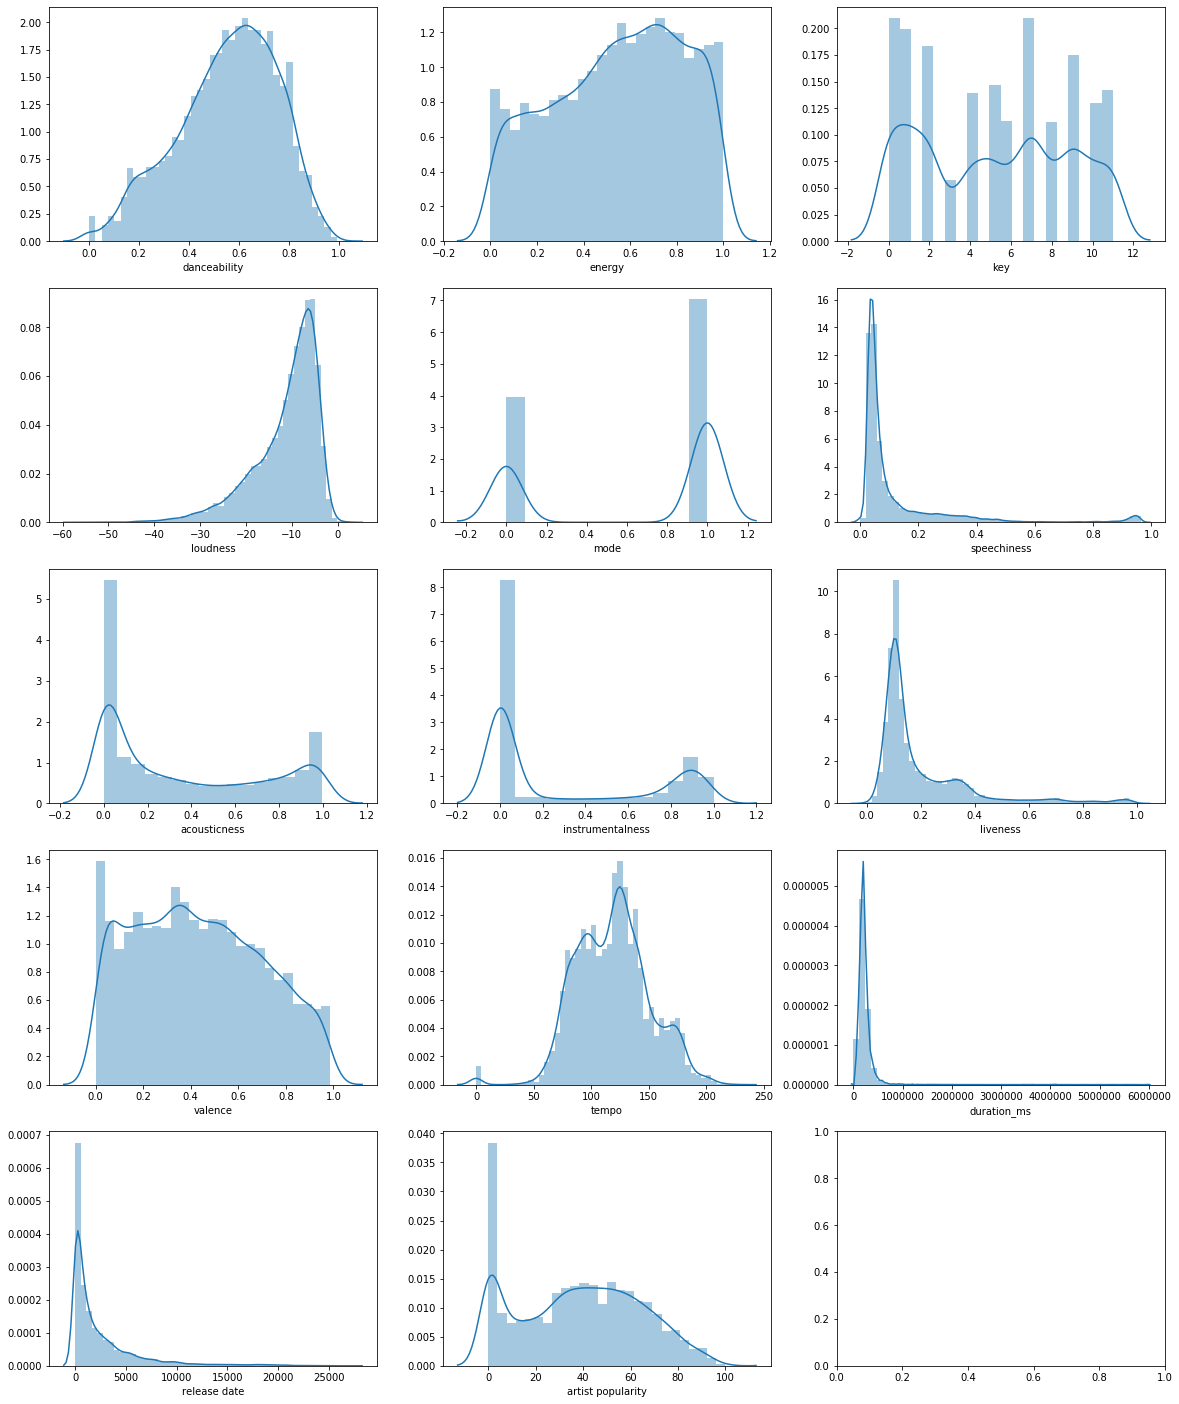

In [575]:
fig, axs = plt.subplots(5, 3, figsize=(20, 25))

for i in range(len(feature_cols)):
    sns.distplot(all_data[feature_cols[i]], ax=axs.flat[i])

#### Using log to transform long tail distributions

In [576]:
import numpy as np

long_tails = ["speechiness","liveness", "duration_ms", "release date"]
for long_tail in long_tails:
    all_data_transformed[long_tail] = np.log(all_data_transformed[long_tail])
    
all_data_transformed.replace([float("inf"), float("-inf")], np.nan, inplace=True)
all_data_transformed.dropna(inplace=True)

/Users/szlota777/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/szlota777/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### distributions after lognormalizing

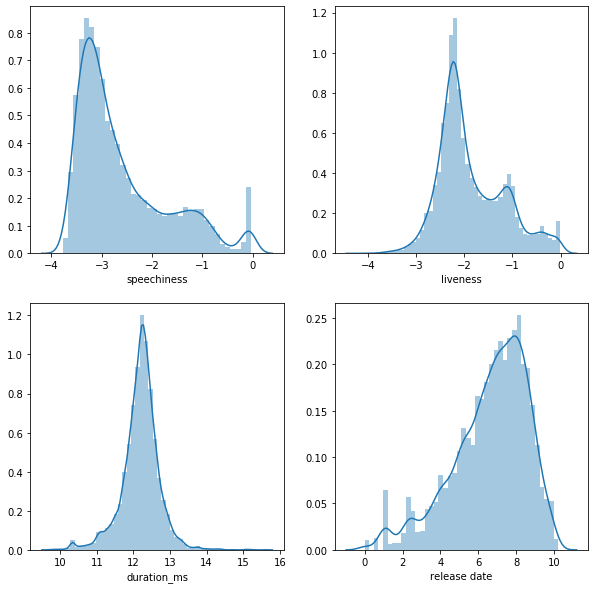

In [577]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))

for i in range(len(long_tails)):
    sns.distplot(all_data_transformed[long_tails[i]], ax=axs.flat[i])

### Dropping Outliers

In [578]:
for feature in long_tails:
    x =  all_data_transformed[feature]
    x = x[x.between(x.quantile(0.025), x.quantile(.975))] # without outliers
    all_data_transformed[feature] = x
all_data_transformed.dropna(inplace=True)

### Using MinMaxScaler to Scale Data

In [579]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features_transformed = scaler.fit_transform(all_data_transformed[feature_cols])
features_transformed = pd.DataFrame(features_transformed, columns=feature_cols)

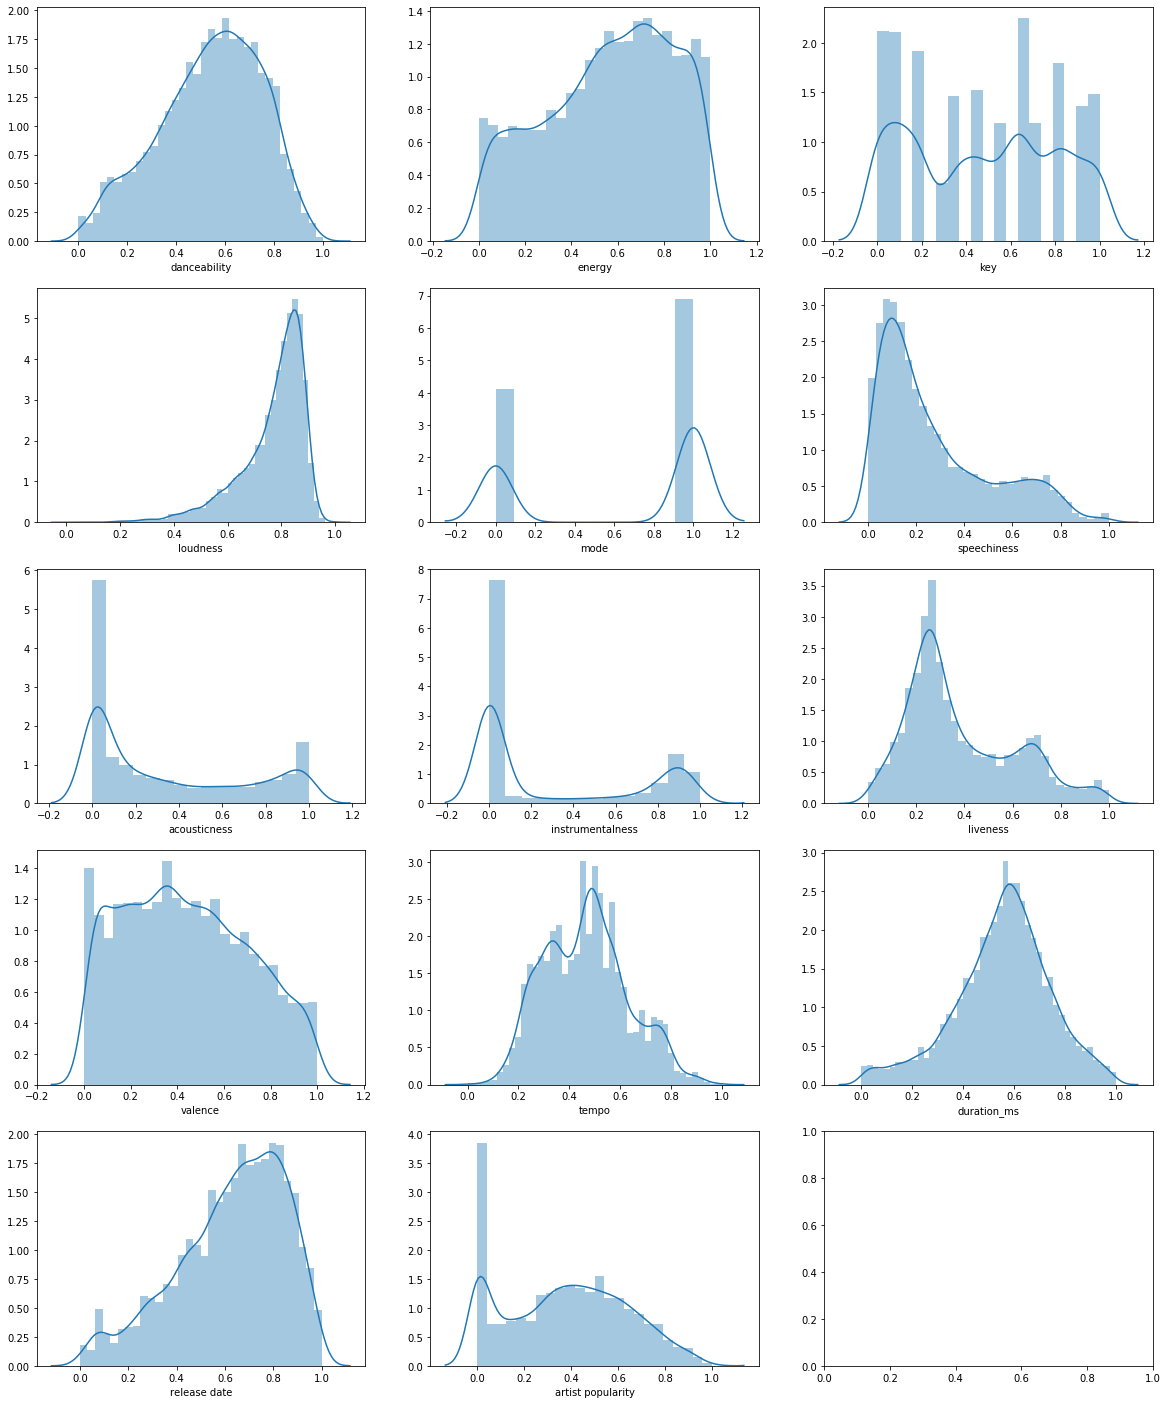

In [580]:
fig, axs = plt.subplots(5, 3, figsize=(20, 25))

for i in range(len(feature_cols)):
    sns.distplot(features_transformed[feature_cols[i]], ax=axs.flat[i])

In [581]:
features = features_transformed
target = np.array(all_data_transformed.iloc[:,-1:]).ravel()

### Feature selection

In [582]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_train, X_test, y_train, y_test = train_test_split(features, target)

select = SelectKBest(score_func = f_regression)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)


In [583]:
print(features.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'release date', 'artist popularity'],
      dtype='object')


In [584]:
select.get_support()

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False])

## 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook). This is a requirement.


### Distributions for Features 

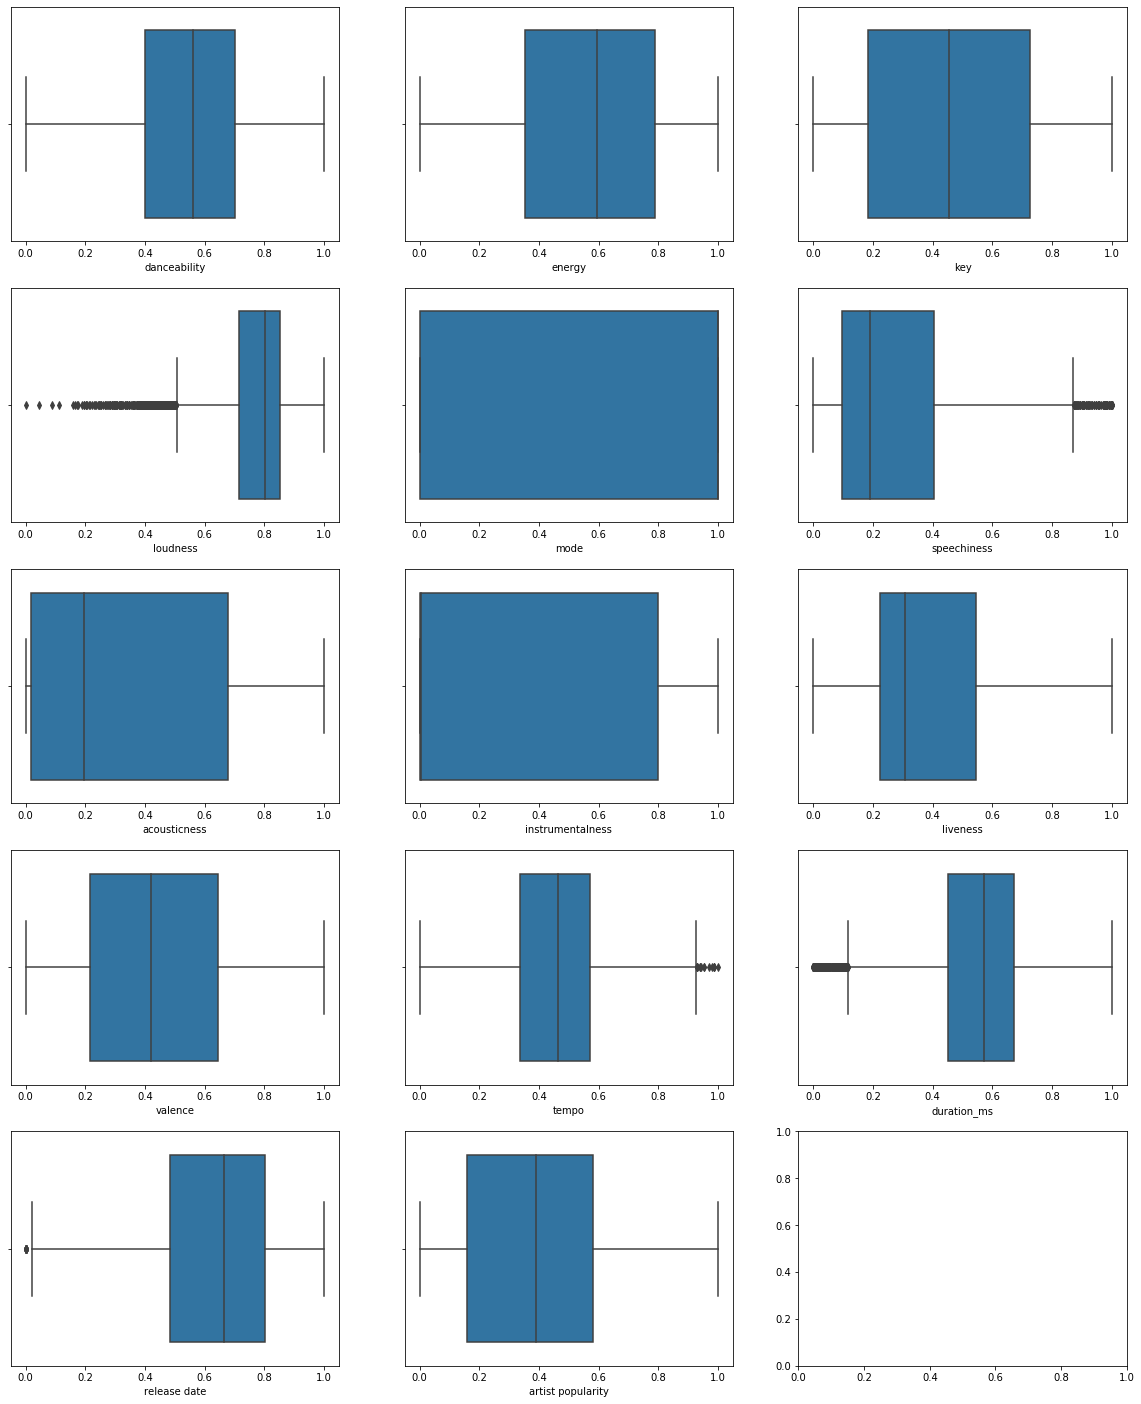

In [585]:
import seaborn as sns
fig, axs = plt.subplots(5, 3, figsize=(20, 25))


for i in range(len(feature_cols)):
    sns.boxplot(features[feature_cols[i]], ax=axs.flat[i])

### Heatmap for Correlations Across Feature Variables

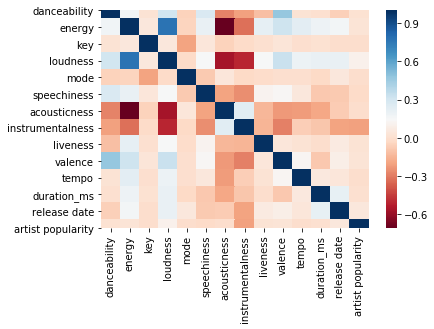

In [586]:
sns.heatmap(features.corr(), cmap ="RdBu")

## Visualizing Features vs. Target Correlation

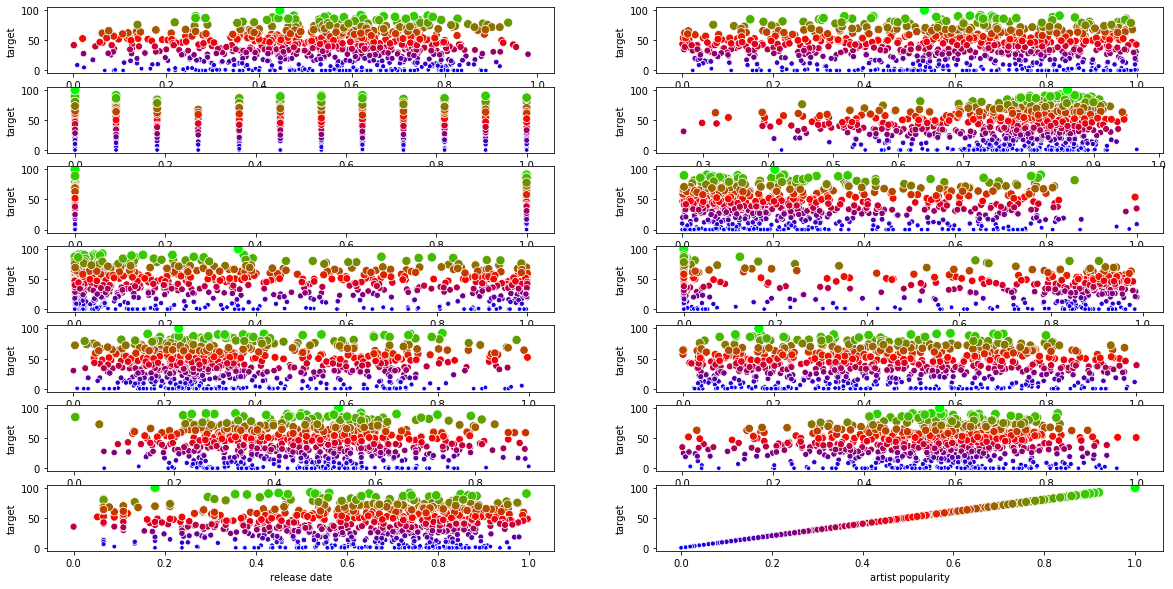

In [616]:
all_data_copy = features.copy()

all_data_copy["target"] = target

all_data_samp = all_data_copy.sample(800)
fig, axs = plt.subplots(7,2 , figsize=(20, 20))


for i in range(len(feature_cols)):
    sns.scatterplot(all_data_samp[feature_cols[i]], all_data_samp["target"], 
                   hue = all_data_copy["target"], 
                    size = all_data_samp["artist popularity"], 
                  sizes=(20,100), 
                    legend=False, 
                    palette="brg",
                    ax=axs.flat[i])

In [588]:
len(features)

8034

### 3.3. Model Construction
* Conduct your hypothesis test(s) here.
* For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch
* Apply machine learning algorithms (apply at least three different algorithms)
* Train your algorithms

### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your **validation set**
    * Use at least two different metrics 
* Evaluate your results from multiple ML models and hypothesis tests
    * What was the performance of each algorithm in plain English? Is there any indication of overfitting/underfitting?
    * Was there a significant difference? Use the template from lecture slides when reporting the results of your hypothesis testing.

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

### 3.6. Model Testing
* Test your tuned algorithms using your **testing set**

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.